In [48]:
# read top 10 states

import pickle
import numpy as np

with open('top10.dat') as f:
    state_top10 = pickle.load(f)
f.close()
for (i,s) in enumerate(state_top10):
    state_top10[i] = s.replace('"','')

In [49]:
# reading model trained on sensor only

#files = ['accuracy.dat','accuracy_new300.dat','accuracy_new300_2.dat','accuracy_new300_3.dat','accuracy_new300_3_stratified.dat']
#files = ['accuracy_new100_3_depth6.dat','accuracy_new100_3_depth6_fsq2_distance.dat']
#files = ['accuracy_new100_3_depth6_fsq2.dat','accuracy_new100_3_depth6_fsq2_distance.dat']

file = 'accuracy_new300_3.dat'

with open(file) as f:
    aucs, confs, labels = pickle.load(f)
f.close()
for (j,lab) in enumerate(labels):
    for (k,l) in enumerate(lab):
        labels[j][k] = l.replace('"','')
    
auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
for (k,lab) in enumerate(labels):
    for (j,state) in enumerate(state_top10):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])
#             for (j2,state2) in enumerate(state_top10):
#                 if state2 in lab:
#                     ind2 = np.where(lab==state2)[0]
#                     conf_top10[j][j2] = np.append(conf_top10[j][j2], confs[k][ind,ind2])

auc_mean_sensor = np.array([])
auc_ci_sensor = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_sensor = np.append(auc_mean_sensor, np.nanmean(a))
    auc_ci_sensor = np.append(auc_ci_sensor, 2*np.nanstd(a)/np.sqrt(208))


In [51]:
# reading model trained on both sensor and foursquare data

file = 'accuracy_new300_3_depth6_fsq2_distance2.dat'

with open(file) as f:
    aucs, confs, labels, aucs_fsq, confs_fsq = pickle.load(f)
f.close()
for (j,lab) in enumerate(labels):
    for (k,l) in enumerate(lab):
        labels[j][k] = l.replace('"','')
    
auc_top10 = list(np.array([]) for ii in range(len(state_top10)))
auc_top10_fsq = list(np.array([]) for ii in range(len(state_top10)))
conf_top10 = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
conf_top10_fsq = list([np.array([]) for iii in range(len(state_top10))] for ii in range(len(state_top10)))
for (k,lab) in enumerate(labels):
    for (j,state) in enumerate(state_top10):
        if state in lab:
            ind = np.where(lab==state)[0]
            auc_top10[j] = np.append(auc_top10[j], aucs[k][ind])
            auc_top10_fsq[j] = np.append(auc_top10_fsq[j], aucs_fsq[k][ind])
            for (j2,state2) in enumerate(state_top10):
                if state2 in lab:
                    ind2 = np.where(lab==state2)[0]
                    conf_top10[j][j2] = np.append(conf_top10[j][j2], confs[k][ind,ind2])
                    conf_top10_fsq[j][j2] = np.append(conf_top10_fsq[j][j2], confs_fsq[k][ind,ind2])

auc_mean_all = np.array([])
auc_ci_all = np.array([])
for (j, a) in enumerate(auc_top10):
    auc_mean_all = np.append(auc_mean_all, np.nanmean(a))
    auc_ci_all = np.append(auc_ci_all, 2*np.nanstd(a)/np.sqrt(208))

auc_mean_fsq = np.array([])
auc_ci_fsq = np.array([])
for (i,a) in enumerate(auc_top10_fsq):
    auc_mean_fsq = np.append(auc_mean_fsq, np.nanmean(a))
    auc_ci_fsq = np.append(auc_ci_fsq, 2*np.nanstd(a)/np.sqrt(208))

In [ ]:
print conf_top10[9][9]

0.6581414865
0.784598404704


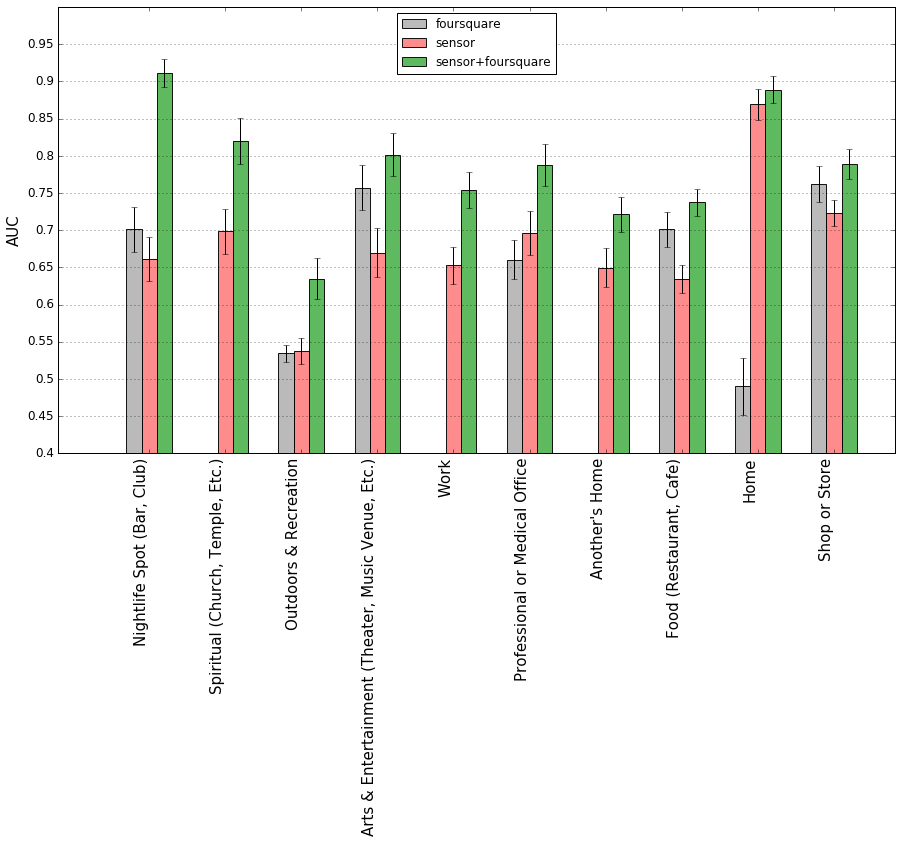

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,8))
w = 1/5.0
plt.bar(np.arange(0,10,1), auc_mean_fsq, w, yerr=auc_ci_fsq, align='center',\
         color=(.7,.7,.7), alpha=0.9, ecolor=(0,0,0))
plt.bar(np.arange(w,10+w,1), auc_mean_sensor, w, yerr=auc_ci_sensor, align='center', \
         color=(1,.5,.5), alpha=0.9, ecolor=(0,0,0))
plt.bar(np.arange(2*w,10+2*w,1), auc_mean_all, w, yerr=auc_ci_all, align='center', \
         color=(.3,.7,.3), alpha=0.9, ecolor=(0,0,0))
#plt.legend(['foursquare','sensor','foursquare+sensor'], loc=2)
plt.legend(['foursquare','sensor','sensor+foursquare'], loc='upper center')
plt.ylabel('AUC',fontsize=15,color=(0,0,0))
axes = plt.gca()
axes.set_xlim([-1, len(state_top10)])
axes.set_ylim([.4, 1])
axes.yaxis.grid();
plt.xticks(np.arange(.2,10.2,1), state_top10, fontsize=15, color=(0,0,0), rotation=90, ha='right');
plt.yticks(np.arange(.4,1,.05), np.arange(.4,1,.05), fontsize=12, color=(0,0,0));
print np.nanmean(auc_mean_fsq)
print np.mean(auc_mean_all)


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_confusion_matrix(cm, labels, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(9,9))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

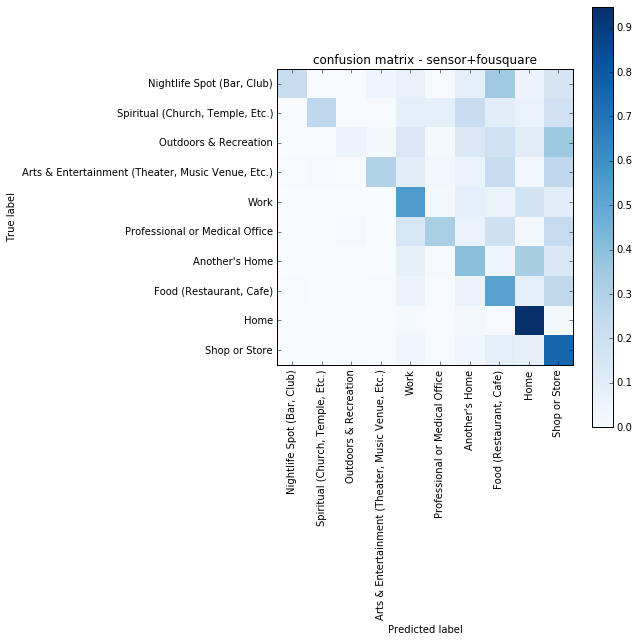

In [53]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confusion matrix - sensor+fousquare')

[ 0.          0.          0.09444444  0.54444444  0.          0.05        0.
  0.1         0.          0.21111111]


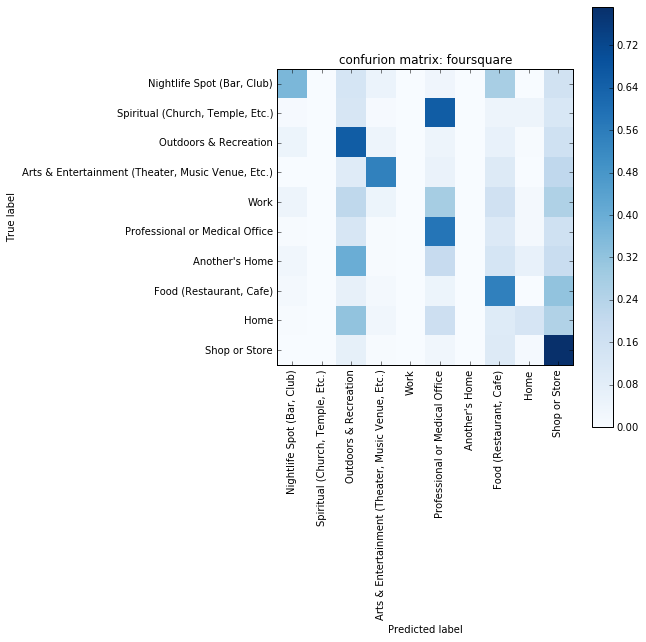

In [54]:
conf = np.zeros([10,10])
for (i,c_row) in enumerate(conf_top10_fsq):
    for (j,c) in enumerate(c_row):
        conf[i,j] = np.sum(conf_top10_fsq[i][j])
cm_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(cm_normalized, state_top10, title='confurion matrix: foursquare')
print cm_normalized[3,:]

In [ ]:
np.isnan(np.nan)